# Final Project - Part 4 - Model Draft 1B (Demo vs Exploit Geo)

## 1B) Random Forest Classifier (Input: Demographics; Output: Exploitation Geo Category)


In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.base import BaseEstimator
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import random
import matplotlib.pyplot as plt
import pdb

In [3]:
#Read Cleaned Global Data
GD_data_final = pd.read_csv('assets/GD_data_final.csv')
GD_data_final.head()

,yearOfRegistration,gender,majorityStatus,ageBroad_mid,citizenshipRegion,citizenshipGeoCategory,exploitationRegion,exploitationGeoCategory,mocDebtBondage,mocTakesEarnings,...,tosProstitution,tosPornography,tosRemoteInteractiveServices,tosPrivateSexualServices,tosNotSpecified,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown
0,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2004,Female,Adult,19.0,Eastern_Europe,Europe,Eastern_Europe,Europe,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,1,0,...,0,0,0,0,1,0,0,0,0,1
4,2012,Female,Minor,13.0,North_America,North_America,North_America,North_America,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Read Demographic vs Exploitation Geo Data
demo_expgeo_calc = pd.read_csv('assets/demo_expgeo_calc.csv')
demo_expgeo_calc2 = demo_expgeo_calc.iloc[:,:25].join(GD_data_final[['exploitationRegion','exploitationGeoCategory']])
demo_expgeo_calc2.columns

Index([u'yearOfRegistration', u'ageBroad_mid', u'g_Female', u'g_Male',
       u'ms_Adult', u'cr_Central_Asia', u'cr_East_Africa', u'cr_East_Asia',
       u'cr_Eastern_Europe', u'cr_Middle_East', u'cr_North_America',
       u'cr_Northeast_Africa', u'cr_South_America', u'cr_South_Asia',
       u'cr_Southeast_Asia', u'cr_Southeastern_Europe', u'cr_Unknown',
       u'cr_West_Africa', u'cg_Africa', u'cg_Asia', u'cg_Europe',
       u'cg_Middle_East', u'cg_North_America', u'cg_South_America',
       u'cg_Unknown', u'exploitationRegion', u'exploitationGeoCategory'],
      dtype='object')

In [5]:
len(demo_expgeo_calc2['cg_South_America'])

18484

Random Forest Train Accuracy ::  0.888158911733
Random Forest Logistic regression Test Accuracy ::  0.883519653805
Cross validating...
Random Forest - train accuracy: 
0.887386837165
X: 
Index([u'ageBroad_mid', u'g_Female', u'ms_Adult', u'cr_Central_Asia',
       u'cr_East_Africa', u'cr_East_Asia', u'cr_Eastern_Europe',
       u'cr_Middle_East', u'cr_North_America', u'cr_Northeast_Africa',
       u'cr_South_America', u'cr_South_Asia', u'cr_Southeast_Asia',
       u'cr_Southeastern_Europe', u'cr_West_Africa'],
      dtype='object')
Feature Importance: 
[ 0.118  0.141  0.025  0.02   0.011  0.     0.247  0.011  0.045  0.002
  0.007  0.015  0.203  0.076  0.077]


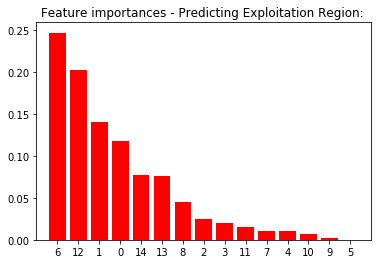

Classes: 
['Central_Asia' 'Central_Europe' 'East_Africa' 'East_Asia' 'Eastern_Europe'
 'Eurasia' 'Mediterranean' 'Middle_East' 'North_America'
 'Northwestern_Europe' 'South_Africa' 'South_America' 'Southeast_Asia'
 'Southeastern_Europe' 'Unknown' 'West_Africa']
Average Probabilities by gender: 
        pp_Central_Asia  pp_Central_Europe  pp_East_Africa  pp_East_Asia  \
gender                                                                     
Female         0.000925           0.029749        0.003131      0.005694   
Male           0.029515           0.003354        0.005879      0.000000   

        pp_Eastern_Europe  pp_Eurasia  pp_Mediterranean  pp_Middle_East  \
gender                                                                    
Female            0.01353    0.080914          0.002802        0.083306   
Male              0.00000    0.380901          0.002935        0.022122   

        pp_North_America  pp_Northwestern_Europe  pp_South_Africa  \
gender                       

In [45]:
# Multinomial Logistic Regression
def demo_expgeo_main():
    demo_expgeo_headers = ['ageBroad_mid', 'g_Female', 'ms_Adult', 
                              'cr_Central_Asia', 'cr_East_Africa', 'cr_East_Asia', 'cr_Eastern_Europe', 'cr_Middle_East', 
                              'cr_North_America', 'cr_Northeast_Africa', 'cr_South_America', 'cr_South_Asia', 
                              'cr_Southeast_Asia', 'cr_Southeastern_Europe', 'cr_West_Africa', 
                             'exploitationRegion']
    
    ### Train Test Split - Out put col index -1 is Geo Category, -2 is Region
    X = demo_expgeo_calc2[demo_expgeo_headers[:-1]]
    y = demo_expgeo_calc2[demo_expgeo_headers[-1]]
    train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7)
    
    # USE TWO DIFFERENT APPROACHES TO TRAIN 
    # Train multi-classification model with logistic regression
    model = RandomForestClassifier(n_estimators=500)
    model.fit(train_x, train_y)
 
    print "Random Forest Train Accuracy :: ", metrics.accuracy_score(train_y, model.predict(train_x))
    print "Random Forest Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, model.predict(test_x))
    
    print ("Cross validating...")
    print ("Random Forest - train accuracy: ")
    print (np.mean(cross_val_score(model, train_x, train_y.values, scoring='accuracy', cv=10)))

    print ("X: ")
    print (X.columns)
    
    #Feature Importances - Break down weights of each feature
    print ("Feature Importance: ")
    importances = model.feature_importances_.round(3)
    print (importances)
    
    ## Graphing Feature Importances
    std = np.std([importances],axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    #print("Feature ranking:")
    #for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances - Predicting Exploitation Region: ")
    plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    print ("Classes: ")
    print (model.classes_)
    
    # Predict Probabilities
    #pp = model.predict_proba(X)    
    cols = ['pp_Central_Asia', 'pp_Central_Europe', 'pp_East_Africa', 'pp_East_Asia', 'pp_Eastern_Europe',
             'pp_Eurasia', 'pp_Mediterranean', 'pp_Middle_East', 'pp_North_America',
             'pp_Northwestern_Europe', 'pp_South_Africa', 'pp_South_America', 'pp_Southeast_Asia',
             'pp_Southeastern_Europe', 'pp_Unknown', 'pp_West_Africa']    
    df_pp = pd.DataFrame(model.predict_proba(X),columns=cols)
    df_data_pp = GD_data_final.join(df_pp)
    #df_pp.head()
    
    # GROUP BYs different demographics
    print ("Average Probabilities by gender: ")
    print (df_data_pp[['gender','pp_Central_Asia', 'pp_Central_Europe', 'pp_East_Africa', 'pp_East_Asia', 'pp_Eastern_Europe',
             'pp_Eurasia', 'pp_Mediterranean', 'pp_Middle_East', 'pp_North_America',
             'pp_Northwestern_Europe', 'pp_South_Africa', 'pp_South_America', 'pp_Southeast_Asia',
             'pp_Southeastern_Europe', 'pp_Unknown', 'pp_West_Africa']].groupby('gender').mean())
    
    print ("Average Probabilites by majorityStatus: ")
    print (df_data_pp[['majorityStatus','pp_Central_Asia', 'pp_Central_Europe', 'pp_East_Africa', 'pp_East_Asia', 'pp_Eastern_Europe',
             'pp_Eurasia', 'pp_Mediterranean', 'pp_Middle_East', 'pp_North_America',
             'pp_Northwestern_Europe', 'pp_South_Africa', 'pp_South_America', 'pp_Southeast_Asia',
             'pp_Southeastern_Europe', 'pp_Unknown', 'pp_West_Africa']].groupby('majorityStatus').mean())

    print ("Average Probabilites by ageBroad_mid: ")
    print (df_data_pp[['ageBroad_mid','pp_Central_Asia', 'pp_Central_Europe', 'pp_East_Africa', 'pp_East_Asia', 'pp_Eastern_Europe',
             'pp_Eurasia', 'pp_Mediterranean', 'pp_Middle_East', 'pp_North_America',
             'pp_Northwestern_Europe', 'pp_South_Africa', 'pp_South_America', 'pp_Southeast_Asia',
             'pp_Southeastern_Europe', 'pp_Unknown', 'pp_West_Africa']].groupby('ageBroad_mid').mean())
    
    print ("Average Probabilites by citizenshipRegion: ")
    print (df_data_pp[['citizenshipRegion','pp_Central_Asia', 'pp_Central_Europe', 'pp_East_Africa', 'pp_East_Asia', 'pp_Eastern_Europe',
             'pp_Eurasia', 'pp_Mediterranean', 'pp_Middle_East', 'pp_North_America',
             'pp_Northwestern_Europe', 'pp_South_Africa', 'pp_South_America', 'pp_Southeast_Asia',
             'pp_Southeastern_Europe', 'pp_Unknown', 'pp_West_Africa']].groupby('citizenshipRegion').mean())
    
    
if __name__ == '__main__':
  demo_expgeo_main()


Accuracy Scores by Features - Output - exploitationGeoCategory:
All Demo Features:
Random Forest Train Accuracy :: 0.886767661153 Random Forest Test Accuracy :: 0.886404615939 Random Forest - train cross val score - accuracy: 0.888879046183

X:

['ageBroad_mid', 'g_Female', 'ms_Adult', 'cr_Central_Asia', 'cr_East_Africa',

'cr_East_Asia', 'cr_Eastern_Europe', 'cr_Middle_East', 'cr_North_America', 'cr_Northeast_Africa',

'cr_South_America', 'cr_South_Asia', 'cr_Southeast_Asia', 'cr_Southeastern_Europe', 'cr_West_Africa']

Feature Importance:

[ 0.116 0.142 0.024 0.02 0.009

0.0 0.249 0.012 0.045 0.002

0.008 0.018 0.2 0.079 0.074]